<a href="https://colab.research.google.com/github/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/blob/main/Spaceship_Titanic_Challenge_Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spaceship Titanic Challenge**


---


**Team Name:** Cosmic Learners (Group 9)

**Team Members:** Ayisha Fidha Maniyodan, Diya Amith Kodappully, Dona Uresha Pamodi Dasanayake, Fawas Afsal, Mohammed Nihad Kaipalli, Sam Jacob, Sandra Binu,Sharon Zacharia

---



Welcome to our Colab notebook for **Assignment 3 – Group Kaggle Challenge**. In this project, our team, tackled the **Spaceship Titanic classification** task from **Kaggle**, where the objective is to predict whether passengers were transported to another dimension during a space voyage.

This notebook showcases a complete machine learning pipeline including:

 * Exploratory Data Analysis (EDA)
 * Data Preprocessing
 * Model Training & Evaluation
 * Hyperparameter Tuning

Our group collaborated via GitHub and Google Colab, ensuring shared contributions, tracked changes, and continuous integration of ideas. This notebook is structured into clear, well-documented sections for reproducibility and transparency.

## **Import Libraries**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

## **Load the Data**

In [2]:
#Load data from GitHub
train_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/train.csv'
test_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/test.csv'

train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

In [3]:
#Print first few rows
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


## **Exploratory Data Analysis (EDA)**

### **Overview and Summary**

In [4]:
#Overview of dataset
print("Dataset info")
train.info()

print("\n Descriptive statistics")
display(train.describe(include = 'all'))

print("\n Missing values")
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values)

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

 Descriptive statistics


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN



 Missing values
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


### **Missing Values**

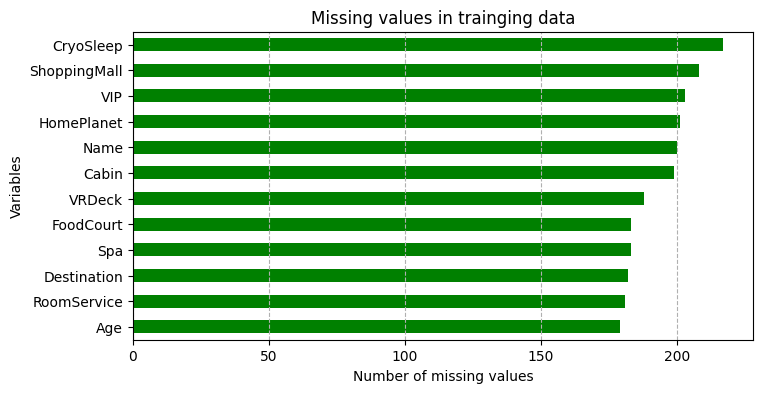

In [5]:
#Visualize the missing values

missing_values = missing_values[missing_values > 0].sort_values(ascending = True)

plt.figure(figsize=(8, 4))
missing_values.plot(kind = 'barh', color ='green')
plt.title("Missing values in trainging data")
plt.xlabel("Number of missing values")
plt.ylabel("Variables")
plt.grid(axis = 'x', linestyle = '--')
plt.show()


### **Target Variable Distribution**

Transported
True     4378
False    4315
Name: count, dtype: int64


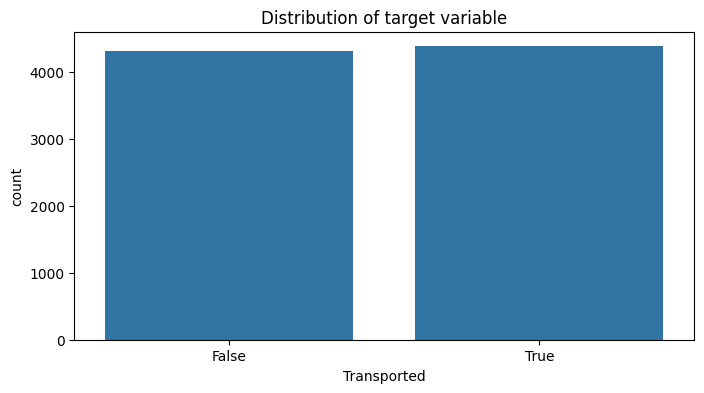

In [6]:
#Target variable distribution
print(train['Transported'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x='Transported', data=train)
plt.title("Distribution of target variable")

plt.show()

### **Categorical Variables Distribution**

/tmp/ipython-input-7-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


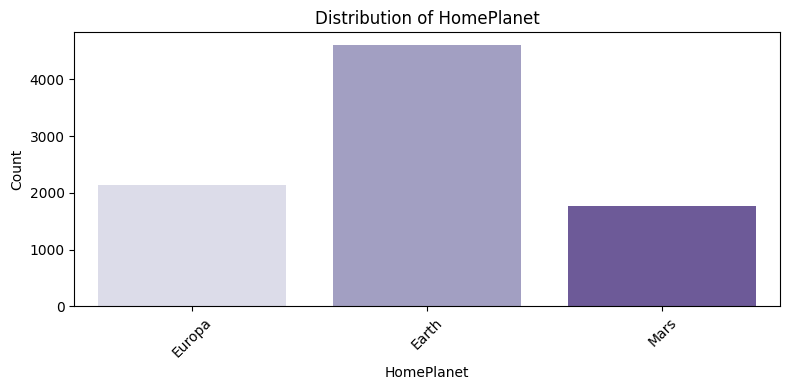

/tmp/ipython-input-7-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


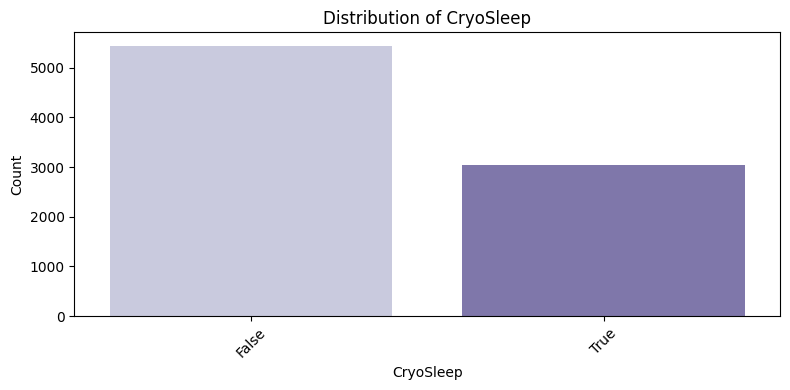

/tmp/ipython-input-7-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


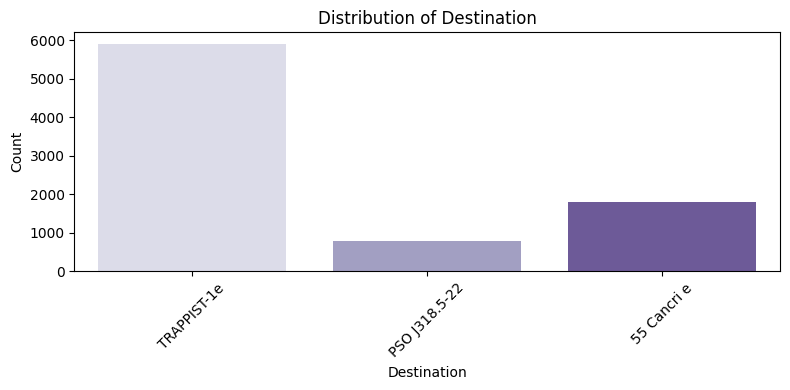

/tmp/ipython-input-7-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


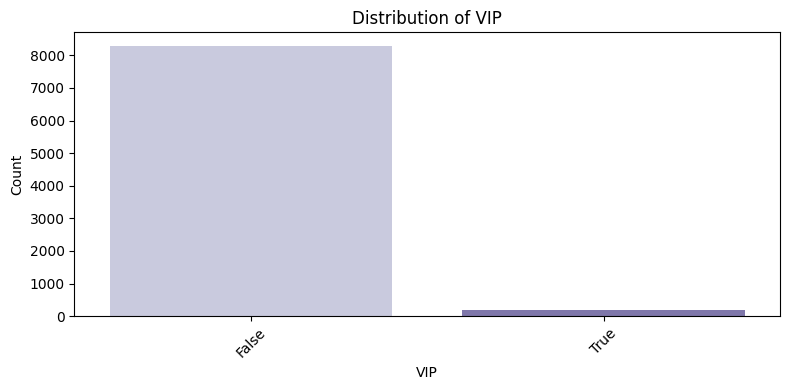

In [7]:
#Distribution of categorical variables "HomePlanet, CryoSleep, Destination, VIP'"

categorical_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for variable in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=train, palette='Purples')
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **Cabin Splitting and Treemap**

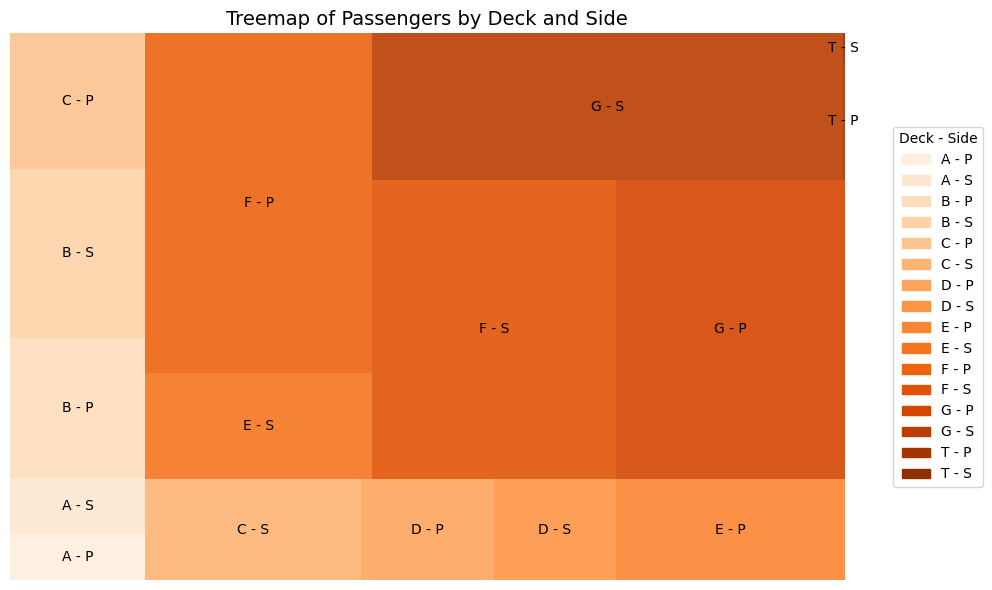

In [8]:
from matplotlib.patches import Patch

# Split the 'Cabin' column
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)

# Group and count
counts = train.groupby(['Deck', 'Side']).size().reset_index(name='Count')
counts['Label'] = counts['Deck'] + ' - ' + counts['Side']

# Color palette
colors = sns.color_palette('Oranges', len(counts))

# Treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=counts['Count'],
    label=counts['Label'],
    color=colors,
    alpha=0.9
)
plt.axis('off')
plt.title("Treemap of Passengers by Deck and Side", fontsize=14)

# Legend
legend_patches = [Patch(color=colors[i], label=counts['Label'][i]) for i in range(len(counts))]
plt.legend(handles=legend_patches, title='Deck - Side', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

### **Numerical Features**

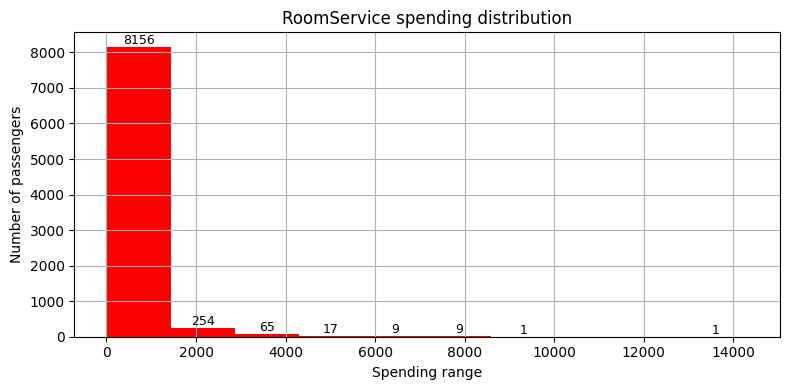

In [9]:
num_col = ['RoomService']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='red')[0][0]

ax.set_xlabel("Spending range")
ax.set_ylabel("Number of passengers")
ax.set_title("RoomService spending distribution")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

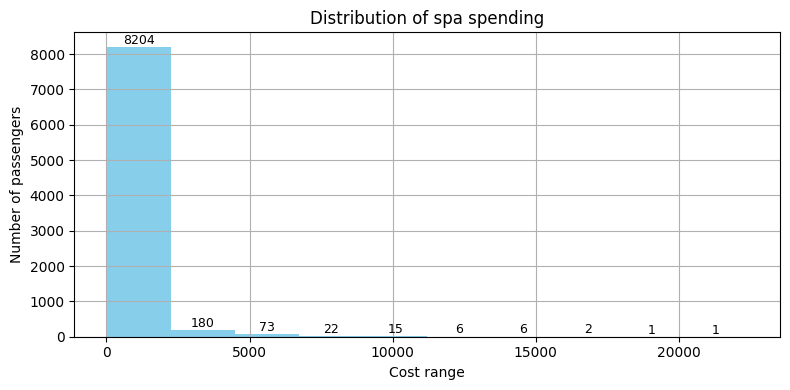

In [10]:
num_col = ['Spa']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='skyblue')[0][0]

ax.set_xlabel("Cost range")
ax.set_ylabel("Number of passengers")
ax.set_title("Distribution of spa spending")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### **Transported vs Features**

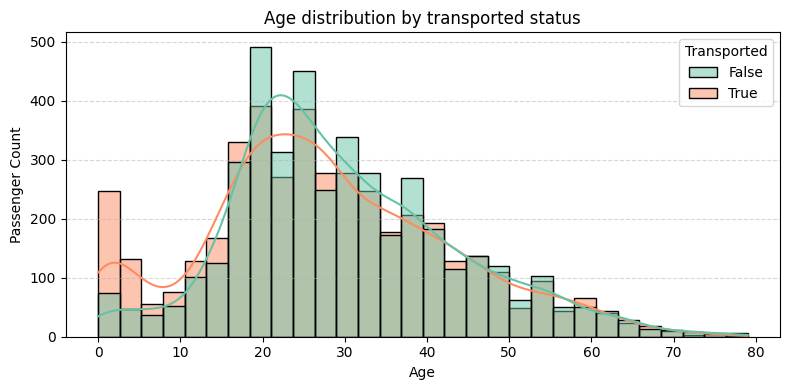

In [11]:
#Age distribution vs transport

plt.figure(figsize=(8, 4))
sns.histplot(data=train, x='Age', hue='Transported', bins=30, kde=True, palette='Set2')
plt.title("Age distribution by transported status")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-2115318661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HomePlanet', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='viridis')
/tmp/ipython-input-12-2115318661.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Side', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='plasma')


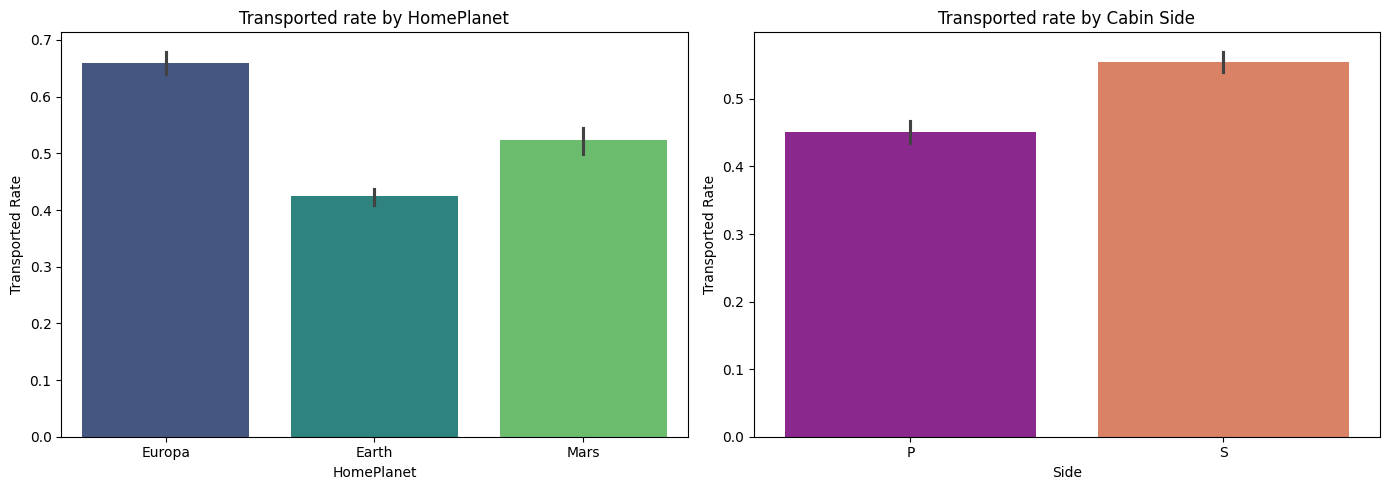

In [12]:
#Transported Rate by HomePlanet/Cabin Side

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='HomePlanet', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.title("Transported rate by HomePlanet")
plt.ylabel("Transported Rate")

plt.subplot(1, 2, 2)
sns.barplot(x='Side', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='plasma')
plt.title("Transported rate by Cabin Side")
plt.ylabel("Transported Rate")

plt.tight_layout()
plt.show()

### **Correlation Heatmap**

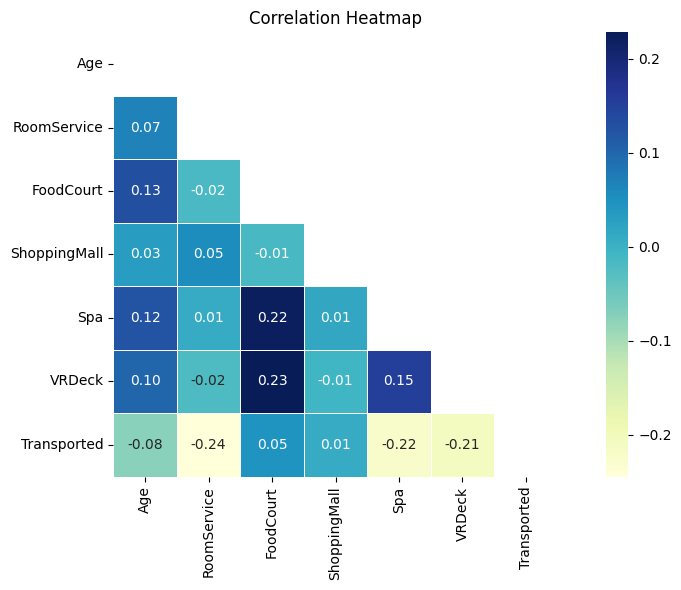

In [13]:
train_corr = train.copy()
train_corr['Transported'] = train_corr['Transported'].astype(int)

plt.figure(figsize=(10, 6))
corr_matrix = train_corr[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

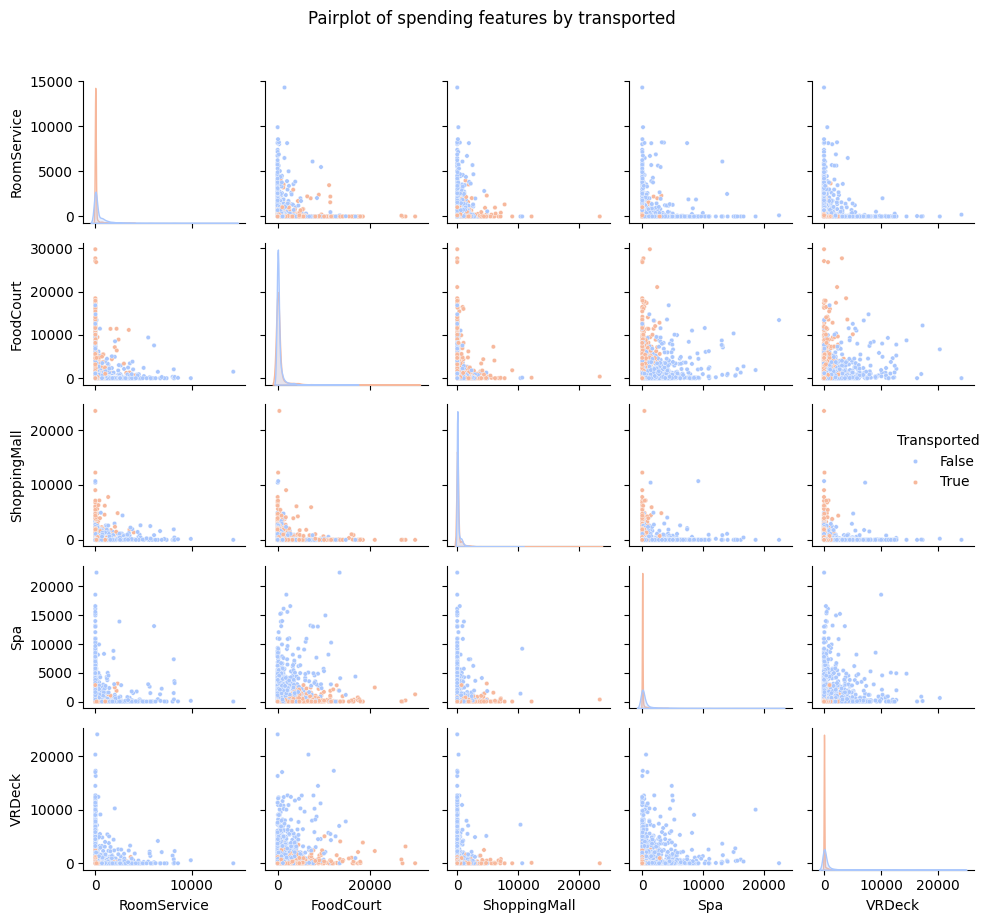

In [14]:
#Spending feature correlations

sns.pairplot(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']],
             hue='Transported',
             palette='coolwarm',
             height=1.8,
             plot_kws={'s' : 10})
plt.suptitle("Pairplot of spending features by transported", y=1.02)
plt.tight_layout()
plt.show()


## **Data Preprocessing**

### **Fill Missing Values**

In [15]:
#Fill numerical with mean

numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numerical_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(test[col].mean())

In [16]:
#Fill 'Name' with 'Unknown'

train['Name'] = train['Name'].fillna('Unknown')
test['Name'] = test['Name'].fillna('Unknown')

In [17]:
#Fill categorical missing value with mode

#Variables 'HomePlanet', 'Destination', 'VIP', 'CryoSleep'

cat_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])

/tmp/ipython-input-17-4183409037.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(train[col].mode()[0])
/tmp/ipython-input-17-4183409037.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(train[col].mode()[0])


### **Cabin Feature Engineering**

In [18]:
#Variable 'Cabin'

#Split the into Deck/Num/Side
train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train['Cabin'].str.split('/', expand=True)
test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test['Cabin'].str.split('/', expand=True)

#Filling the missing deck and side with mode
train['Cabin_Deck'] = train['Cabin_Deck'].fillna(train['Cabin_Deck'].mode()[0])
test['Cabin_Deck'] = test['Cabin_Deck'].fillna(train['Cabin_Deck'].mode()[0])

train['Cabin_Side'] = train['Cabin_Side'].fillna(train['Cabin_Side'].mode()[0])
test['Cabin_Side'] = test['Cabin_Side'].fillna(train['Cabin_Side'].mode()[0])

print(train[['Cabin', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']].head())

#Cabin_Num is numeric
train['Cabin_Num'] = pd.to_numeric(train['Cabin_Num'], errors='coerce')
test['Cabin_Num'] = pd.to_numeric(test['Cabin_Num'], errors='coerce')

train['Cabin_Num'] = train['Cabin_Num'].fillna(train['Cabin_Num'].mean())
test['Cabin_Num'] = test['Cabin_Num'].fillna(train['Cabin_Num'].mean())


   Cabin Cabin_Deck Cabin_Num Cabin_Side
0  B/0/P          B         0          P
1  F/0/S          F         0          S
2  A/0/S          A         0          S
3  A/0/S          A         0          S
4  F/1/S          F         1          S


In [19]:
#Recombined split variables to Cabin

#Make data types string
train['Cabin_Deck'] = train['Cabin_Deck'].astype(str)
train['Cabin_Side'] = train['Cabin_Side'].astype(str)
test['Cabin_Deck'] = test['Cabin_Deck'].astype(str)
test['Cabin_Side'] = test['Cabin_Side'].astype(str)

# Ensure Cabin_Num is numeric, it was already converted to int in the previous cell
train['Cabin_Num'] = train['Cabin_Num'].astype(int)
test['Cabin_Num'] = test['Cabin_Num'].astype(int)


#Recombine to new Cabin column
train['N_Cabin'] = train['Cabin_Deck'] + '/' + train['Cabin_Num'].astype(str) + '/' + train['Cabin_Side']
test['N_Cabin'] = test['Cabin_Deck'] + '/' + test['Cabin_Num'].astype(str) + '/' + test['Cabin_Side']

print(train[['N_Cabin']].head())

#Drop old split columns from train and test if exist

for df in [train, test]:
    for col in ['Deck', 'CabinNum', 'Side']:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

  N_Cabin
0   B/0/P
1   F/0/S
2   A/0/S
3   A/0/S
4   F/1/S


In [20]:
# Drop the original cabin-related columns from train and test
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-21-1258496534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Cabin_Deck', palette='Purples')
/tmp/ipython-input-21-1258496534.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Cabin_Side', palette='Purples')


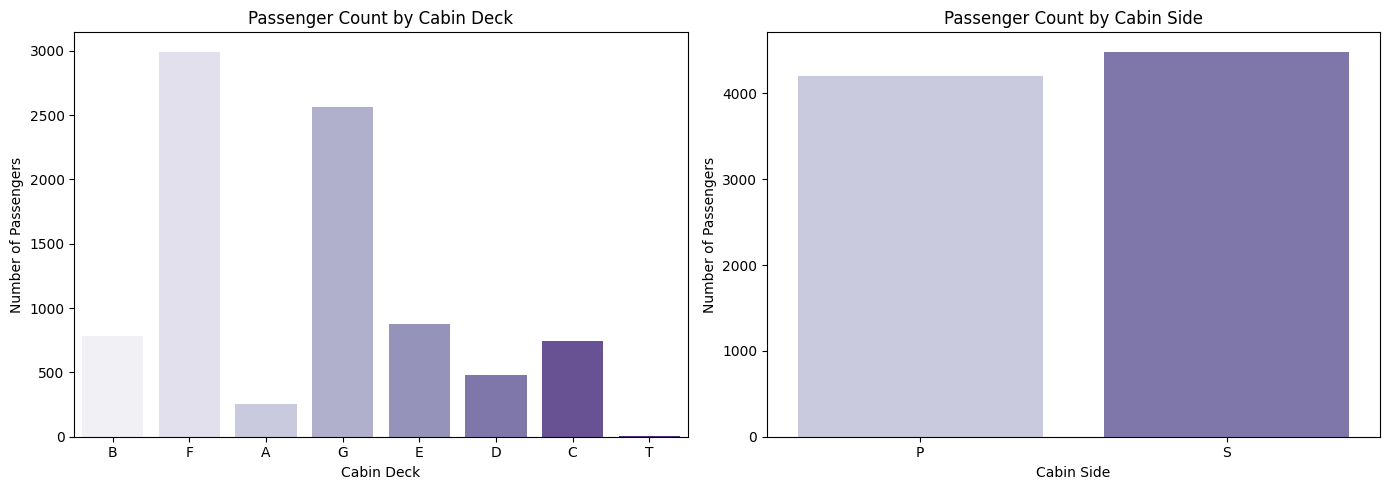

In [21]:
###################### remove if unwanted
plt.figure(figsize=(14,5))

#Cabin_Deck count
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Cabin_Deck', palette='Purples')
plt.title('Passenger Count by Cabin Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('Number of Passengers')

#Cabin_Side count
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Cabin_Side', palette='Purples')
plt.title('Passenger Count by Cabin Side')
plt.xlabel('Cabin Side')
plt.ylabel('Number of Passengers')

plt.tight_layout()
plt.show()

In [22]:
#Age
#Filled with median since age may skewed

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

In [23]:
print("\n Missing values - Train \n")
print(train.isnull().sum())

print("\n Missing values - Test \n")
print(test.isnull().sum())


 Missing values - Train 

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Cabin_Deck      0
Cabin_Num       0
Cabin_Side      0
N_Cabin         0
dtype: int64

 Missing values - Test 

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Cabin_Deck      0
Cabin_Num       0
Cabin_Side      0
N_Cabin         0
dtype: int64


### **Encoding Categorical Variables**

In [24]:
#Encoding categorical variables

cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                    'Cabin_Deck', 'Cabin_Side']

#Convert categories into numbers using LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

    #Print mapping of codes to original categories
    print(f"Mapping for {col}:")
    for code, category in enumerate(encoder.classes_):
        print(f"  {code} --> {category}")
    print()

#Check first few rows
print("\n Encoded data")
print(train[cat_cols].head())

Mapping for HomePlanet:
  0 --> Earth
  1 --> Europa
  2 --> Mars

Mapping for CryoSleep:
  0 --> False
  1 --> True

Mapping for Destination:
  0 --> 55 Cancri e
  1 --> PSO J318.5-22
  2 --> TRAPPIST-1e

Mapping for VIP:
  0 --> False
  1 --> True

Mapping for Cabin_Deck:
  0 --> A
  1 --> B
  2 --> C
  3 --> D
  4 --> E
  5 --> F
  6 --> G
  7 --> T

Mapping for Cabin_Side:
  0 --> P
  1 --> S


 Encoded data
   HomePlanet  CryoSleep  Destination  VIP  Cabin_Deck  Cabin_Side
0           1          0            2    0           1           0
1           0          0            2    0           5           1
2           1          0            2    1           0           1
3           1          0            2    0           0           1
4           0          0            2    0           5           1


## **Model Building & Implemenation**

### **Train/Test Split**

In [25]:
#Select target variable and features

target = 'Transported'

#Variables use to predict the target variable
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']

#Seperate X and y for training
X = train[features]
y = train[target].astype(int)

#Select features for test set
X_test = test[features]

#Print training data set shape
print("Shape of training features (X):", X.shape)
print("Shape of target variable (y): \n", y.shape)

#Print first 5 rows of to check data
print("\n First 5 rows of X:")
print(X.head())

#Print distribution of target variable
print("\nTarget variable distribution:")
print(y.value_counts())

Shape of training features (X): (8693, 13)
Shape of target variable (y): 
 (8693,)

 First 5 rows of X:
   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        109.0        9.0   
2           1          0            2  58.0    1         43.0     3576.0   
3           1          0            2  33.0    0          0.0     1283.0   
4           0          0            2  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Cabin_Deck  Cabin_Num  Cabin_Side  
0           0.0     0.0     0.0           1          0           0  
1          25.0   549.0    44.0           5          0           1  
2           0.0  6715.0    49.0           0          0           1  
3         371.0  3329.0   193.0           0          0           1  
4         151.0   565.0     2.0           5          1           1  

Target variable distribu

In [26]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### **PCA**

In [ ]:
# from sklearn.decomposition import PCA

In [ ]:
# pca = PCA(n_components=12)
# X_train = pca.fit_transform(X_train_scaled)
# X_val = pca.transform(X_val_scaled)


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 4))
# plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()


In [ ]:
# # Get absolute feature contributions to the top components
# abs_loadings = np.abs(pca.components_)  # Shape: [n_components x n_features]
# feature_importance = abs_loadings.sum(axis=0)  # Sum across components

# # Feature names (if using DataFrame)
# features = X.columns if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X.shape[1])]

# # Sort by importance
# sorted_idx = np.argsort(feature_importance)[::-1]
# sorted_features = [features[i] for i in sorted_idx]
# sorted_importance = feature_importance[sorted_idx]

# # Plot
# plt.figure(figsize=(12, 6))
# plt.bar(sorted_features, sorted_importance, color='skyblue')
# plt.xticks(rotation=90)
# plt.xlabel('Original Features')
# plt.ylabel('PCA Importance (sum of absolute loadings)')
# plt.title('Feature Importance from PCA (Top 5 Components)')
# plt.tight_layout()
# plt.show()

### **Hyper Parametric Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],  # or 'saga' for larger datasets
    'max_iter': [100, 200]
}

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

 #XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

### **Grid Search**

Logistic Regression

In [29]:
# Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='accuracy')

Random Forest

In [30]:
# Random Forest
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

XG Boost

In [31]:
# XGBoost
grid_xgb = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

### **Random Forest Model**

In [32]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.7947096032202415

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       861
           1       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### **Logistic Regression Model**

In [33]:
lr=LogisticRegression(C=0.01, max_iter=200, random_state=42)
lr.fit(X,y)
lr_pred=lr.predict(X_val)


print("Validation Accuracy:", accuracy_score(y_val, lr_pred))
print("\nClassification Report:\n", classification_report(y_val, lr_pred))

Validation Accuracy: 0.7694077055779184

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.76       861
           1       0.75      0.82      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **XGbooster train model**

In [34]:
# Best model
best_xgb = grid_xgb.best_estimator_

# Predict and evaluate
y_pred = best_xgb.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Validation Accuracy: 0.7998849913743531

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       861
           1       0.79      0.81      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### **Neural Network Model**

In [35]:
# Define neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [38]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# # Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=60, batch_size=32, verbose=1,callbacks=[early_stop,reduce_lr])

Epoch 1/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6488 - loss: 0.7081 - val_accuracy: 0.7418 - val_loss: 0.5230 - learning_rate: 0.0010
Epoch 2/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - loss: 0.5388 - val_accuracy: 0.7694 - val_loss: 0.4746 - learning_rate: 0.0010
Epoch 3/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7669 - loss: 0.5085 - val_accuracy: 0.7786 - val_loss: 0.4670 - learning_rate: 0.0010
Epoch 4/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7760 - loss: 0.4800 - val_accuracy: 0.7976 - val_loss: 0.4628 - learning_rate: 0.0010
Epoch 5/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7813 - loss: 0.4843 - val_accuracy: 0.7987 - val_loss: 0.4579 - learning_rate: 0.0010
Epoch 6/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7833 - loss: 0.4894 - val_accuracy: 0.7964 - val_loss: 0.4571 - learning_rate: 0.0010
Epoch 7/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7836 - loss: 0.4846 

In [40]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"\n Validation Accuracy: {val_acc:.4f}")


 Validation Accuracy: 0.8120


In [41]:
#Save the model
model.save('/content/sample_data/NN_model.h5')

In [42]:
#Load the model
loaded_model = tf.keras.models.load_model('/content/sample_data/NN_model.h5')



---


## **⚠️!!! RUN THE BELOW CELLS WITH CAUTION , DONOT RUN UN NECESSARLY⚠️**


---



In [ ]:
'''history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=60, batch_size=32, verbose=1,callbacks=[early_stop,reduce_lr])'''

Epoch 1/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6331 - loss: 0.7325 - val_accuracy: 0.7619 - val_loss: 0.5213 - learning_rate: 0.0010
Epoch 2/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7461 - loss: 0.5451 - val_accuracy: 0.7884 - val_loss: 0.4757 - learning_rate: 0.0010
Epoch 3/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7653 - loss: 0.5084 - val_accuracy: 0.7890 - val_loss: 0.4683 - learning_rate: 0.0010
Epoch 4/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7785 - loss: 0.5055 - val_accuracy: 0.7890 - val_loss: 0.4673 - learning_rate: 0.0010
Epoch 5/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7703 - loss: 0.4962 - val_accuracy: 0.7867 - val_loss: 0.4648 - learning_rate: 0.0010
Epoch 6/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7880 - loss: 0.4843 - val_accuracy: 0.7786 - val_loss: 0.4642 - learning_rate: 0.0010
Epoch 7/60
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.4711 - 

## **Model Evaluation**

In [43]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"\n Validation Accuracy: {val_acc:.4f}")


 Validation Accuracy: 0.8120


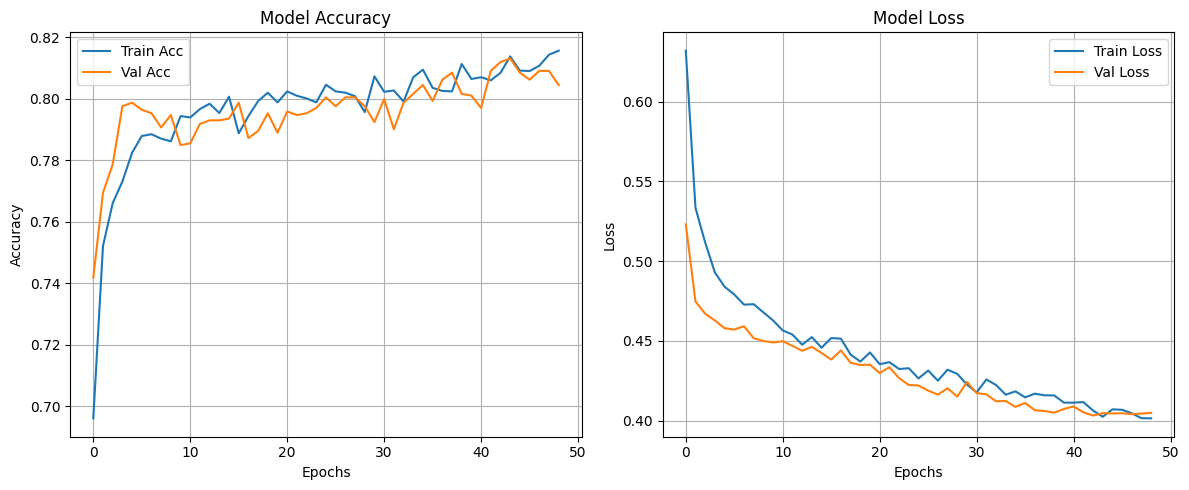

In [44]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **Model Prediction**

In [45]:
# Predict on the test set
test_preds = model.predict(X_test)
test_preds_binary = (test_preds > 0.5).astype(bool)

# Load original test data to get PassengerId
test_raw = pd.read_csv(test_data)

# Combine predictions with PassengerId
predictions_df = pd.DataFrame({
    'PassengerId': test_raw['PassengerId'],
    'Transported': test_preds_binary.flatten()
})

print(predictions_df.head(10))

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True


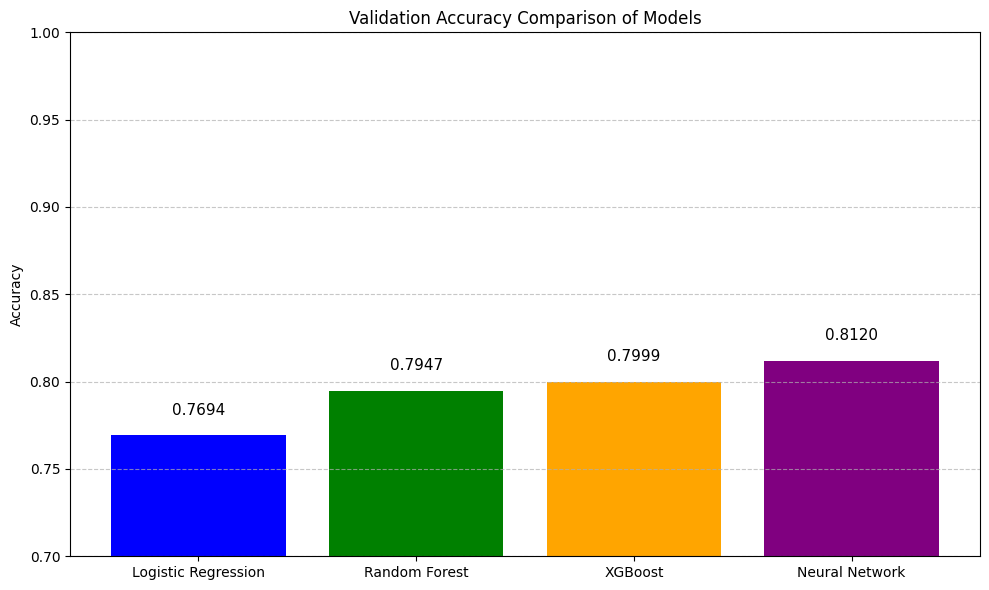

In [46]:
# Store model names and their corresponding validation accuracies
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network']
accuracies = [
    accuracy_score(y_val, lr_pred),           # Logistic Regression
    accuracy_score(y_val, rf.predict(X_val)), # Random Forest
    accuracy_score(y_val, best_xgb.predict(X_val)), # XGBoost
    val_acc                                    # Neural Network
]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple'])

# Annotate each bar with the accuracy value
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=11)

# Customize the plot
plt.ylim(0.7, 1.0)
plt.title("Validation Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



---


**Comparing the above models, we got the best accuracy for Neural
Network model. So use this model for inference**


---



In [47]:
# best_rf_model = grid_rf.best_estimator_

In [48]:
# y_test_pred = best_rf_model.predict(test[features])

In [49]:
X_test_scaled = scaler.transform(test[features])


In [50]:
y_test_pred_nn = model.predict(X_test_scaled).ravel()

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
y_test_pred_nn_labels = (y_test_pred_nn > 0.5).astype(bool)


##**Submission File**

In [52]:
# Create submission DataFrame
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_test_pred_nn_labels})

# Display the first few rows of the submission file
print("Submission file preview:")
print(submission.head())

# Save the submission file
submission_path = 'submission.csv'
submission.to_csv(submission_path, index=False)

print(f"\nSubmission file saved successfully at: {submission_path}")

Submission file preview:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

Submission file saved successfully at: submission.csv
